In [42]:
import pandas as pd
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
invasion_train = pd.read_csv('https://stepik.org/media/attachments/course/4852/invasion.csv')

In [3]:
invasion_train

,class,g_reflection,i_reflection,speed,brightness,time_of_observance,volume
0,transport,2.190672,6.716633,62.168208,0.347465,158221,44.932446
1,transport,3.453276,8.995909,62.994707,0.590094,385972,41.568300
2,transport,2.432994,6.938691,62.245807,0.329288,446482,40.123467
3,fighter,6.083763,3.019459,18.474555,0.174738,210125,11.384865
4,fighter,12.876769,2.452950,195.805771,0.150446,23109,11.328806
...,...,...,...,...,...,...,...
495,fighter,9.901731,7.162124,58.095069,0.145065,395762,12.901909
496,transport,3.574132,7.118835,62.928159,0.469670,435926,39.926551
497,fighter,9.186049,4.580781,412.102112,0.108195,299594,12.178203
498,fighter,8.278256,8.353756,268.121561,0.132661,361911,13.905809


In [5]:
X_train = invasion_train.drop('class', axis=1)
y_train = invasion_train['class']

In [6]:
parametrs = {'n_estimators' : range(10,50,10),
             'max_depth' : range(1,12,2),
             'min_samples_leaf' : range(1,7),
             'min_samples_split' : range(2,9,2)}

In [7]:
rf = RandomForestClassifier(random_state=0)

In [8]:
search = GridSearchCV(rf, parametrs, cv=5, n_jobs=-1)

In [9]:
search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=0), n_jobs=-1,
             param_grid={'max_depth': range(1, 12, 2),
                         'min_samples_leaf': range(1, 7),
                         'min_samples_split': range(2, 9, 2),
                         'n_estimators': range(10, 50, 10)})

In [10]:
best_clf = search.best_estimator_

In [21]:
search.best_params_

{'max_depth': 3,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 10}

In [14]:
oper_info = pd.read_csv('https://stepik.org/media/attachments/course/4852/operative_information.csv')

In [15]:
oper_info

,g_reflection,i_reflection,speed,brightness,time_of_observance,volume
0,7.516543,3.916691,513.954279,0.177247,105908,13.267224
1,4.322988,6.967689,63.752970,0.545922,277855,39.833130
2,4.595724,9.098297,62.233948,0.389201,160662,42.014556
3,2.689675,7.964869,62.475495,0.541081,162092,42.056829
4,8.075576,5.169719,336.441261,0.174757,466853,11.779813
...,...,...,...,...,...,...
1495,11.755466,5.583147,325.069957,0.170644,388400,13.210917
1496,12.220137,4.023177,439.975574,0.163958,195305,13.819358
1497,1.611053,7.864930,65.025106,0.430021,307856,47.369083
1498,7.114131,5.532188,391.178342,0.150117,51590,12.447761


In [17]:
pd.Series(best_clf.predict(oper_info)).value_counts()

fighter      675
transport    595
cruiser      230
dtype: int64

In [19]:
feature_importances = pd.DataFrame({'features_name' : X_train.columns,
                                    'importances' : best_clf.feature_importances_})

In [20]:
feature_importances.sort_values('importances', ascending=False)

,features_name,importances
3,brightness,0.363803
5,volume,0.257661
2,speed,0.171441
1,i_reflection,0.124372
0,g_reflection,0.082723
4,time_of_observance,0.000000


## Задание 2

In [22]:
space = pd.read_csv('https://stepik.org/media/attachments/course/4852/space_can_be_a_dangerous_place.csv')

In [23]:
space.head()

,r,phi,peradventure_index,dustiness,black_hole_is_near,buggers_were_noticed,nearby_system_has_planemo,dangerous
0,169.1,138.0,22.3212,0.706285,0,1,1,1
1,11.1,148.0,1.4652,-0.410512,1,1,1,1
2,274.6,201.0,36.2472,0.756457,1,1,1,1
3,172.8,173.0,22.8096,0.035221,1,1,1,1
4,223.3,222.0,29.4756,0.197271,0,1,1,1


In [25]:
X_train = space.drop('dangerous', axis=1)
y_train = space.dangerous

In [27]:
search_space = GridSearchCV(rf, parametrs, cv=5, n_jobs=-1)

In [28]:
search_space.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=0), n_jobs=-1,
             param_grid={'max_depth': range(1, 12, 2),
                         'min_samples_leaf': range(1, 7),
                         'min_samples_split': range(2, 9, 2),
                         'n_estimators': range(10, 50, 10)})

In [29]:
search_space.best_params_

{'max_depth': 7,
 'min_samples_leaf': 5,
 'min_samples_split': 2,
 'n_estimators': 30}

In [30]:
best_clf = search_space.best_estimator_

In [31]:
feat_imp = pd.DataFrame({'features' : list(X_train), 'importances' : best_clf.feature_importances_})

In [33]:
feat_imp.sort_values('importances', ascending=False)

,features,importances
5,buggers_were_noticed,0.539257
6,nearby_system_has_planemo,0.417684
4,black_hole_is_near,0.015407
3,dustiness,0.008058
1,phi,0.006767
0,r,0.006670
2,peradventure_index,0.006157


<AxesSubplot:>

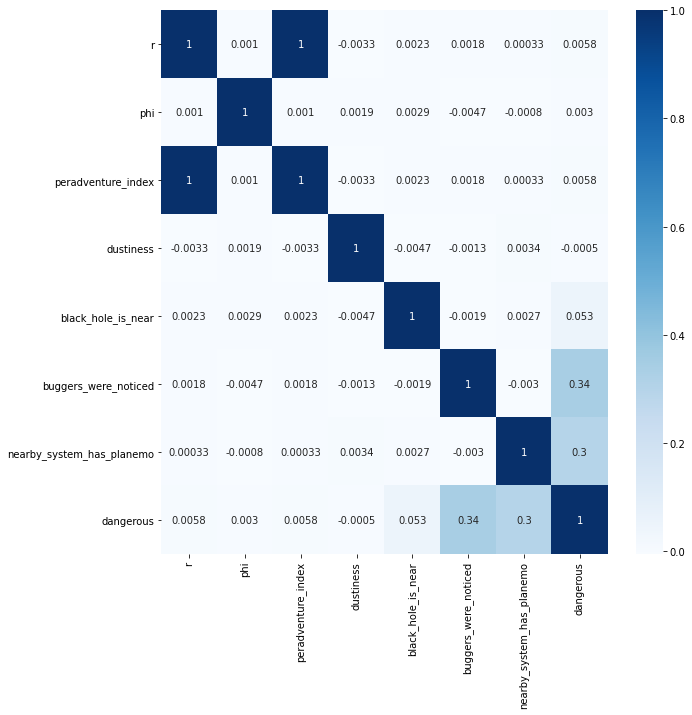

In [44]:
plt.figure(figsize=(10,10))
sns.heatmap(space.corr(), annot=True, cmap=plt.cm.Blues)

In [59]:
df = pd.DataFrame(range(10000000))

In [60]:
%%timeit
df.apply(np.mean)

30.8 ms ± 243 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [61]:
%%timeit
df.apply('mean')

30.4 ms ± 233 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [62]:
%%timeit
df.mean(axis=0)

30.3 ms ± 592 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [63]:
%%timeit
df.describe().loc['mean']

442 ms ± 5.38 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [71]:
stock = pd.read_csv('https://raw.githubusercontent.com/PacktPublishing/Pandas-Cookbook/master/data/amzn_stock.csv',
                    index_col='Date',
                    parse_dates=True)

In [72]:
stock.head()

,Open,High,Low,Close,Volume
Date,,,,,
2010-01-04,136.25,136.61,133.14,133.90,7600543
2010-01-05,133.43,135.48,131.81,134.69,8856456
2010-01-06,134.60,134.73,131.65,132.25,7180977
2010-01-07,132.01,132.32,128.80,130.00,11030124
2010-01-08,130.56,133.68,129.03,133.52,9833829


In [73]:
stock['2010-02' : '2011-03']

,Open,High,Low,Close,Volume
Date,,,,,
2010-02-01,123.18,124.86,113.82,118.87,37774317
2010-02-02,118.79,118.98,114.40,118.12,23084986
2010-02-03,117.12,119.61,116.56,119.10,12409012
2010-02-04,118.64,120.33,115.74,115.94,12783912
2010-02-05,115.88,117.65,114.10,117.39,11027086
...,...,...,...,...,...
2011-03-25,171.64,173.49,170.30,170.98,4294302
2011-03-28,171.80,172.50,169.25,169.35,3400936
2011-03-29,170.73,174.84,170.07,174.62,4887443


In [76]:
stock.resample('2h').asfreq()

,Open,High,Low,Close,Volume
Date,,,,,
2010-01-04 00:00:00,136.25,136.61,133.14,133.90,7600543.0
2010-01-04 02:00:00,NaN,NaN,NaN,NaN,NaN
2010-01-04 04:00:00,NaN,NaN,NaN,NaN,NaN
2010-01-04 06:00:00,NaN,NaN,NaN,NaN,NaN
2010-01-04 08:00:00,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...
2017-07-16 16:00:00,NaN,NaN,NaN,NaN,NaN
2017-07-16 18:00:00,NaN,NaN,NaN,NaN,NaN
2017-07-16 20:00:00,NaN,NaN,NaN,NaN,NaN


In [77]:
stock.resample('1w').mean()

,Open,High,Low,Close,Volume
Date,,,,,
2010-01-10,133.3700,134.564,130.8860,132.872,8900385.80
2010-01-17,129.5660,130.472,126.9940,128.252,10756782.40
2010-01-24,126.5475,128.255,123.7925,125.360,9883903.25
2010-01-31,123.5780,125.528,120.5840,122.796,18627194.20
2010-02-07,118.7220,120.286,114.9240,117.884,19415862.60
...,...,...,...,...,...
2017-06-25,1003.6940,1007.236,993.9580,999.006,3435057.40
2017-07-02,987.3720,994.062,974.0140,981.004,3719885.20
2017-07-09,967.1325,976.000,958.6025,967.240,3116265.75


### Среднее за последние 3 дня

In [78]:
stock.rolling(3).mean()

,Open,High,Low,Close,Volume
Date,,,,,
2010-01-04,NaN,NaN,NaN,NaN,NaN
2010-01-05,NaN,NaN,NaN,NaN,NaN
2010-01-06,134.760000,135.606667,132.200000,133.613333,7.879325e+06
2010-01-07,133.346667,134.176667,130.753333,132.313333,9.022519e+06
2010-01-08,132.390000,133.576667,129.826667,131.923333,9.348310e+06
...,...,...,...,...,...
2017-07-11,982.516667,991.846667,978.786667,989.786667,3.057460e+06
2017-07-12,992.883333,1001.326667,988.440000,999.036667,3.379189e+06
2017-07-13,999.423333,1003.806667,992.573333,1000.423333,3.157356e+06


In [79]:
stock.rolling(3, min_periods=1).mean()

,Open,High,Low,Close,Volume
Date,,,,,
2010-01-04,136.250000,136.610000,133.140000,133.900000,7.600543e+06
2010-01-05,134.840000,136.045000,132.475000,134.295000,8.228500e+06
2010-01-06,134.760000,135.606667,132.200000,133.613333,7.879325e+06
2010-01-07,133.346667,134.176667,130.753333,132.313333,9.022519e+06
2010-01-08,132.390000,133.576667,129.826667,131.923333,9.348310e+06
...,...,...,...,...,...
2017-07-11,982.516667,991.846667,978.786667,989.786667,3.057460e+06
2017-07-12,992.883333,1001.326667,988.440000,999.036667,3.379189e+06
2017-07-13,999.423333,1003.806667,992.573333,1000.423333,3.157356e+06


### Среднее из предыдущих

In [80]:
stock.expanding().mean()

,Open,High,Low,Close,Volume
Date,,,,,
2010-01-04,136.250000,136.610000,133.140000,133.900000,7.600543e+06
2010-01-05,134.840000,136.045000,132.475000,134.295000,8.228500e+06
2010-01-06,134.760000,135.606667,132.200000,133.613333,7.879325e+06
2010-01-07,134.072500,134.785000,131.350000,132.710000,8.667025e+06
2010-01-08,133.370000,134.564000,130.886000,132.872000,8.900386e+06
...,...,...,...,...,...
2017-07-11,376.749450,380.480122,372.654524,376.793171,4.534246e+06
2017-07-12,377.079033,380.811907,372.984923,377.125827,4.533757e+06
2017-07-13,377.410364,381.142460,373.313812,377.455026,4.532884e+06


<AxesSubplot:xlabel='Date'>

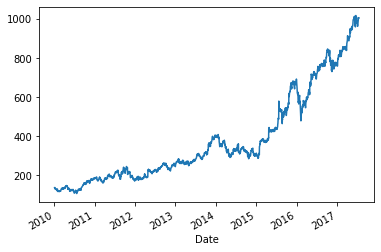

In [81]:
stock['Open'].plot()

In [82]:
ns = stock['Open'].rolling(10, min_periods=1).mean()

<AxesSubplot:xlabel='Date'>

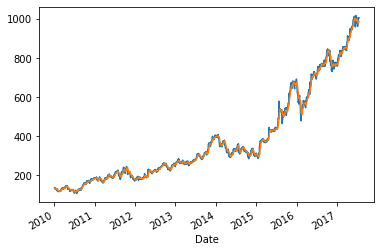

In [83]:
stock['Open'].plot()
ns.plot()

### Порядковый номер дня в указанной дате

In [84]:
stock.index.weekday

Int64Index([0, 1, 2, 3, 4, 0, 1, 2, 3, 4,
            ...
            0, 2, 3, 4, 0, 1, 2, 3, 4, 0],
           dtype='int64', name='Date', length=1896)

In [87]:
stock.index.day_name()

Index(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Monday',
       'Tuesday', 'Wednesday', 'Thursday', 'Friday',
       ...
       'Monday', 'Wednesday', 'Thursday', 'Friday', 'Monday', 'Tuesday',
       'Wednesday', 'Thursday', 'Friday', 'Monday'],
      dtype='object', name='Date', length=1896)

In [88]:
stock.index.day_name().value_counts()

Wednesday    390
Tuesday      389
Thursday     382
Friday       380
Monday       355
Name: Date, dtype: int64

### Номер среднего дня в году

In [93]:
np.mean(stock.index.dayofyear)

178.00632911392404

### Число дней каждого из чисел месяца

In [94]:
stock.index.day.value_counts()

8     65
9     65
10    65
11    65
12    65
23    65
13    65
7     64
14    64
6     63
17    63
22    63
19    63
15    63
16    62
5     62
21    62
3     62
27    62
28    62
20    61
24    61
2     61
26    60
18    60
4     59
1     58
29    58
25    57
30    56
31    35
Name: Date, dtype: int64